## Extension - investigating the size of disease subclusters

### Setup

Adjust the variables below as desired.

In [13]:
# The number of iterations to perform (training -> explaining -> finding subclusters)
big_loop_iterations = 10

# The number of times the explainer should be run in a single iteration
explainer_runs = 1

# Top n subclusters whose size will be analysed
n = 5

# Path to store the resulting files
filepath = "11_Jun_subclusters"

# Set up directory for result files
import os
dir = f'./results_{filepath}'
if not os.path.exists(dir):
    os.mkdir(dir)

### Load dataset

The synthetic dataset can be used for testing during development. The KIRC dataset is used for the experiment.

In [2]:
from GNNSubNet import GNNSubNet as gnn
import pandas as pd
import numpy as np

# # Kidney data set  ------------------------- #
loc   = "GNNSubNet/datasets/kirc/"
ppi   = f'{loc}/KIDNEY_RANDOM_PPI.txt'
feats = [f'{loc}/KIDNEY_RANDOM_Methy_FEATURES.txt', f'{loc}/KIDNEY_RANDOM_mRNA_FEATURES.txt']
targ  = f'{loc}/KIDNEY_RANDOM_TARGET.txt'

# Synthetic data set  ------------------------- #
# loc   = "GNNSubNet/datasets/synthetic/"
# ppi   = f'{loc}/NETWORK_synthetic.txt'
# feats = [f'{loc}/FEATURES_synthetic.txt']
# targ  = f'{loc}/TARGET_synthetic.txt'

# Read in the synthetic data
g = gnn.GNNSubNet(loc, ppi, feats, targ, normalize=False)

# Get some general information about the data dimension
g.summary()

Graph is connected  False
Calculate subgraph ...
Number of subgraphs:  118
Size of subgraph:  2049
Graph is connected  True
##################
# DATASET LOADED #
##################

Number of nodes: 2049
Number of edges: 13588
Number of modalities: 2


### Run

For the given number of big_loop_iterations, this cell trains the GNN model, runs the explainer to find the global explanation, and performs disease subnetwork detection. 

The modules found and the list of module importances in each iteration are saved in the results folder, these can be used for further analysis.

NB: running on KIRC data for 10 iterations can take 1 to 2 hours!

In [ ]:
import shutil

accuracies = []
most_important_communities = [] 
community_sizes = np.zeros((big_loop_iterations, n))

for i in range(big_loop_iterations):
    g = gnn.GNNSubNet(loc, ppi, feats, targ, normalize=False)
    g.train()
    accuracies.append(g.accuracy)
    g.explain(explainer_runs)

    # Copy communities and importances to separate folder for later analysis
    shutil.copyfile(f"{loc}\communities_scores.txt", f"results_{filepath}/{i}_communities_scores.txt")
    shutil.copyfile(f"{loc}\communities.txt", f"results_{filepath}/{i}_communities.txt")
    shutil.copyfile(f"{loc}\gene_names.txt", f"results_{filepath}/{i}_gene_names.txt")

### Results
Helper methods: these read the data that was saved from the run and are used to visualise the results.

In [4]:
import numpy as np
## Helper methods to read the communities detected by GNNSubNet

def read_communities(file_path):
    communities = []
    with open(file_path, 'r') as file:
        for line in file:
            community = [int(num) for num in line.strip().split(',') if num]
            communities.append(community)
    return communities

def read_community_importances(file_path):
    community_importances = []
    with open(file_path, 'r') as file:
        for line in file:
          community_importances.append(float(line.strip()))
    return community_importances

def nth_most_important_community(n, communities, importances, gene_names_path):
    sorted_indices = np.argsort(importances)[::-1]
    sorted_communities = []
    for index in sorted_indices:
      sorted_communities.append(communities[index])
    gene_names = []
    with open(gene_names_path, 'r') as file:
        for line in file:
          gene_names.append(line.strip())
    ans = []
    for elem in sorted_communities[n]:
        ans.append(gene_names[elem])
    return ans

Examine the size of the top n subclusters. Here, the rank of subcluster is its importance. Rank 1 is the first most important subcluster, rank 2 the 2nd most important, etc.


Examine the frequency with which genes occur in the top 1 (most important) subcluster.

Most important community: 
Iteration 0:  ['ABCC8', 'ABCC9', 'ADCY1', 'ADCY2', 'ADCY3', 'ADCY5', 'ADCY7', 'ADCY8', 'ADCY9', 'ADCYAP1R1', 'AKAP1', 'DRD2', 'DRD5', 'GABBR1', 'GABBR2', 'GHRHR', 'GNAS', 'GPR161', 'GPR37', 'GPR83', 'GRM2', 'GRM3', 'HTR1A', 'HTR5A', 'KCNJ6', 'KCNJ8', 'LHCGR', 'LIPE', 'OPRL1', 'OPRM1', 'PCLO', 'PDE4B', 'PDYN', 'PNLIP', 'PNPLA3', 'PRKACA', 'PRKACG', 'RAPGEF4', 'RIMS2', 'SLC6A3', 'SLC6A4', 'TAAR9', 'TSHR']
Iteration 1:  ['ASZ1', 'DDX4', 'MAEL', 'PIWIL1', 'PIWIL2', 'PIWIL4', 'TDRD1', 'TDRD5', 'TDRD6', 'TDRD7', 'TDRD9']
Iteration 2:  ['AHI1', 'AKAP9', 'ALMS1', 'C2CD3', 'CC2D2A', 'CDK5RAP2', 'CENPJ', 'CEP135', 'CEP152', 'CEP164', 'CEP192', 'CEP250', 'CEP57', 'CEP63', 'CEP78', 'CEP97', 'FBF1', 'HAUS5', 'HAUS6', 'INVS', 'IQCB1', 'KIF24', 'NEDD1', 'NINL', 'NME7', 'NPHP1', 'NPHP4', 'NUMA1', 'ODF2', 'PCM1', 'PCNT', 'PKN1', 'PLK2', 'PLK4', 'RPGRIP1', 'RPGRIP1L', 'SASS6', 'SCLT1', 'SDCCAG8', 'SFI1', 'TBCD', 'TCTN2', 'TMEM67', 'TUBB2B', 'TUBGCP2', 'TUBGCP3', 'TUBGCP4', 'TU

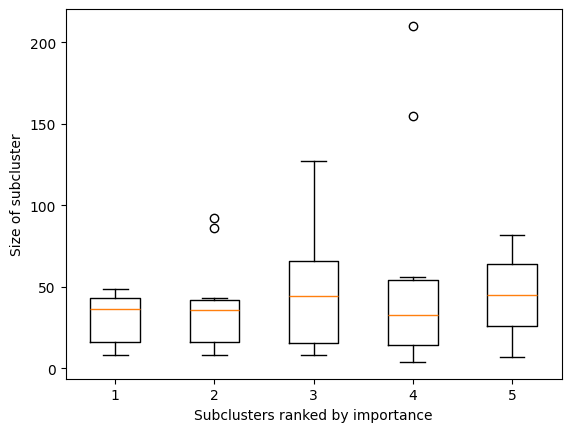

Number of appearances in the topmost important community over 10 iterations: 
Counter({'ABCC8': 2, 'ABCC9': 2, 'ADCY1': 2, 'ADCY2': 2, 'ADCY3': 2, 'ADCY5': 2, 'ADCY7': 2, 'ADCY8': 2, 'ADCY9': 2, 'ADCYAP1R1': 2, 'AKAP1': 2, 'DRD2': 2, 'DRD5': 2, 'GABBR1': 2, 'GABBR2': 2, 'GHRHR': 2, 'GNAS': 2, 'GPR161': 2, 'GPR37': 2, 'GPR83': 2, 'GRM2': 2, 'GRM3': 2, 'HTR1A': 2, 'HTR5A': 2, 'KCNJ6': 2, 'KCNJ8': 2, 'LHCGR': 2, 'LIPE': 2, 'OPRL1': 2, 'OPRM1': 2, 'PCLO': 2, 'PDE4B': 2, 'PDYN': 2, 'PNLIP': 2, 'PNPLA3': 2, 'PRKACA': 2, 'PRKACG': 2, 'RAPGEF4': 2, 'RIMS2': 2, 'SLC6A3': 2, 'SLC6A4': 2, 'TAAR9': 2, 'TSHR': 2, 'ABT1': 2, 'BMS1': 2, 'DCAF13': 2, 'DDX18': 2, 'DDX21': 2, 'DDX24': 2, 'DIS3L': 2, 'DNTTIP2': 2, 'ESF1': 2, 'EXOSC9': 2, 'FBL': 2, 'FTSJ3': 2, 'GNL2': 2, 'HEATR1': 2, 'MPHOSPH10': 2, 'MYBBP1A': 2, 'NAT10': 2, 'NCL': 2, 'NMD3': 2, 'NOL10': 2, 'NOL6': 2, 'NOP14': 2, 'NOP2': 2, 'NOP58': 2, 'PDCD11': 2, 'PES1': 2, 'PIH1D1': 2, 'POLR1B': 2, 'PWP2': 2, 'RBM28': 2, 'RRP1': 2, 'RRP12': 2, 'RRP9': 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
most_important_communities = [] 
community_sizes = np.zeros((big_loop_iterations, n))

print("Most important community: ")
for i in range(big_loop_iterations):
    for j in range(n):
        comms = read_communities(f"results_{filepath}/{i}_communities.txt")
        imps = read_community_importances(f"results_{filepath}/{i}_communities_scores.txt")
        community = nth_most_important_community(j, comms, imps, f"{loc}/gene_names.txt")
        community_sizes[i,j] = len(community)
        if j == 0:
            most_important_communities.extend(community)
            community.sort()
            print(f"Iteration {i}: ", community)

print("Averages:")
print(community_sizes.mean(axis=0))
print("Minimum:")
print(community_sizes.min(axis=0))
print("Maximum")
print(community_sizes.max(axis=0))
print("Deviation")
print(community_sizes.std(axis=0))
plt.boxplot(community_sizes)
plt.xlabel("Subclusters ranked by importance")
plt.ylabel("Size of subcluster")
plt.show()

# Count the number of times each gene occurs in the topmost important community across all iterations
print(f"Number of appearances in the topmost important community over {big_loop_iterations} iterations: ")
print(Counter(most_important_communities))
